# Declaration of Originality

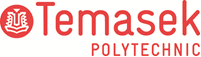

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Ng Hong Long (2401425J)
* Tutorial Group                : B01
* Tutor						    : Mr Srivastava Ruchir
* Submission Date               : 11 February 2026


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

# 1. Business Understanding


## 1.1 Defining the Real World Problem
E-commerce platforms struggle to identify high-intent users during a browsing session, resulting in missed conversion opportunities and inefficient allocation of marketing resources.

## 1.2 Translate Business Problem → ML Problem
To address this problem, the task is framed as a supervised binary classification problem, where the objective is to predict whether an active browsing session will result in a purchase (Revenue = True/False) based on user behaviour, engagement metrics, and session attributes.

## 1.3 Define Business Objective vs ML Objective
Business Objective
- Increase conversion rates and reduce wasted marketing spend by identifying high-intent users early.

ML Objective
- Build a predictive model that accurately distinguishes purchasing sessions from non-purchasing sessions, with particular emphasis on correctly identifying potential buyers.

## 1.4 Defining Success Critieria
Success Criteria
- The model should outperform a baseline classifier.
- It should achieve strong Recall and F1-score for the purchasing class.
- The model must generalise well and be deployable in a real-time web application.

## 1.5 Stakeholders & Impact
Target Users / Stakeholders
- E-commerce businesses and digital marketing teams seeking to improve conversion efficiency.
- Product managers optimising user experience and engagement strategies.

## 1.6 Dataset Justification
The Online Shoppers Purchasing Intention Dataset is sourced from the UCI Machine Learning Repository and is based on real user browsing sessions collected over a one-year period. It contains realistic behavioural metrics commonly used in industry analytics tools, making it suitable for real-world modelling and deployment.

## 1.7 Summary of Business Understanding
This project aims to solve a real-world e-commerce conversion problem by predicting purchase intention using supervised machine learning. By framing the task from both business and technical perspectives, the project ensures that subsequent data analysis, model development, and evaluation are aligned with practical deployment and business impact.

# 2. Data Understanding

## 2.1 Load dataset

In [2]:
## Read *.csv file into pandas DataFrame
FILE_PATH= "C:\\Users\\Hong Long\\Downloads\\online_shoppers_intention.csv"
df = pd.read_csv(FILE_PATH)
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


### 2.1.1 Dataset Overview & Context
The Online Shoppers Purchasing Intention Dataset contains 12,330 user sessions collected over a one-year period, where each session corresponds to a unique user. The dataset includes behavioural metrics derived from real-time page interactions, engagement indicators, temporal features, and user attributes commonly used in e-commerce analytics.

The target variable Revenue indicates whether a browsing session resulted in a completed purchase, framing the task as a supervised binary classification problem.

## 2.2 Summary Statistics

In [3]:
## Understand the type of variable for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

The data structure and data types of each feature are inspected to determine appropriate preprocessing strategies.

The output shows a mix of numerical, categorical, and boolean features. Numerical features represent session counts, durations, and behavioural metrics, while categorical and boolean features capture contextual information such as visitor type, month of visit, and whether the session occurred on a weekend.

Understanding the data types is essential for selecting suitable transformations, such as scaling for numerical features and encoding for categorical variables, in later preprocessing steps.


In [4]:
## Check for missing data
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

Missing value analysis is performed to assess data completeness and determine whether imputation is required.

The results show that there are **no missing values** across all features in the dataset. This indicates good data quality and allows preprocessing to proceed without introducing imputed values that could distort the original data distribution.

As a result, no missing value imputation is applied during preprocessing.


In [5]:
## Get the shape of the DataFrame
df.shape

(12330, 18)

The dataset dimensions are examined to understand the overall scale of the data.

The dataset contains **12,330 rows**, where each row represents a unique user session, and **18 columns**, which include behavioural features, contextual attributes, and the target variable `Revenue`.

This confirms that the dataset meets the project requirement of having at least 1,000 samples and provides sufficient data for training and evaluating supervised machine learning models.

In [7]:
## Get summary statistics of the DataFrame
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


Summary statistics are examined to understand the distribution, scale, and variability of numerical features.

The statistics reveal that several duration-related features, such as `ProductRelated_Duration`, exhibit high variance and right-skewed distributions. This suggests the presence of outliers, which likely correspond to highly engaged user sessions rather than data errors.

These observations inform subsequent preprocessing decisions, including the use of standardisation for numerical features and the retention of outliers to preserve meaningful behavioural patterns.


## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

In [8]:
## Understanding distribution of target

# Count of each class in the target variable
df['Revenue'].value_counts()

# Proportion of each class in the target variable
df['Revenue'].value_counts(normalize=True)

Revenue
False    0.845255
True     0.154745
Name: proportion, dtype: float64

The distribution of the target variable `Revenue` is examined to understand the balance between purchasing and non-purchasing sessions.

The results show that a significantly larger proportion of sessions did not result in a purchase, indicating that the dataset is **class imbalanced**. This reflects real-world e-commerce behaviour, where only a small percentage of browsing sessions typically lead to completed transactions.

Understanding this imbalance is critical, as it directly influences:
- the choice of evaluation metrics
- model selection
- interpretation of model performance

As a result, accuracy alone will not be sufficient to evaluate model performance, and metrics such as **F1-score**, which balance precision and recall, will be prioritised in later stages of the project.

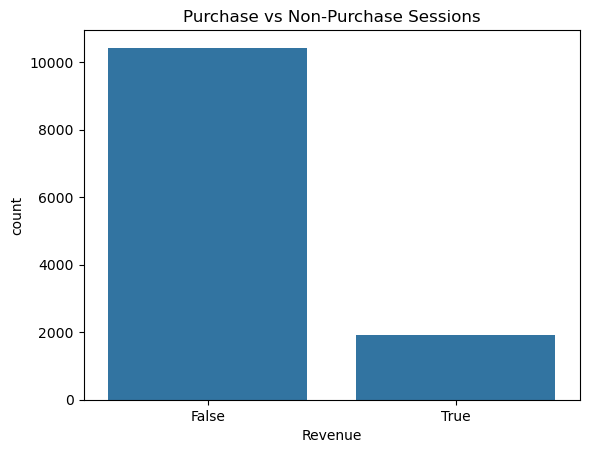

In [9]:
## Understanding distribution of target variable 'Revenue'
## Visualize target variable distribution
sns.countplot(x='Revenue', data=df)
plt.title('Purchase vs Non-Purchase Sessions')
plt.show()

The count plot visualises the distribution of the target variable `Revenue`, comparing sessions that resulted in a purchase (`True`) against those that did not (`False`).

The plot clearly shows a **strong class imbalance**, with a significantly larger number of non-purchase sessions compared to purchase sessions. This reflects real-world e-commerce behaviour, where the majority of users browse without completing a transaction.

This imbalance has important implications for model development and evaluation:
- A naive model that predicts all sessions as non-purchases could still achieve high accuracy.
- Therefore, **accuracy alone would be misleading** as an evaluation metric.
- Metrics that account for class imbalance, such as **F1-score**, will be prioritised to ensure the model effectively identifies genuine purchasing sessions while controlling false positives.

Understanding this distribution early ensures that subsequent modelling decisions are aligned with both the data characteristics and the underlying business objective.

### 2.3.1.2 Distribution and Outlier Analysis of Key Numerical Features

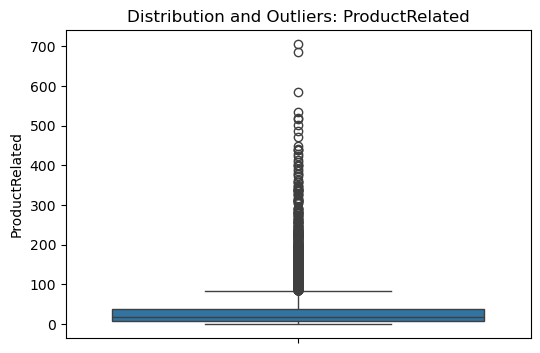

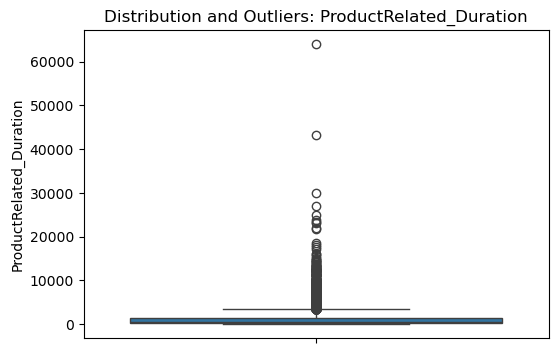

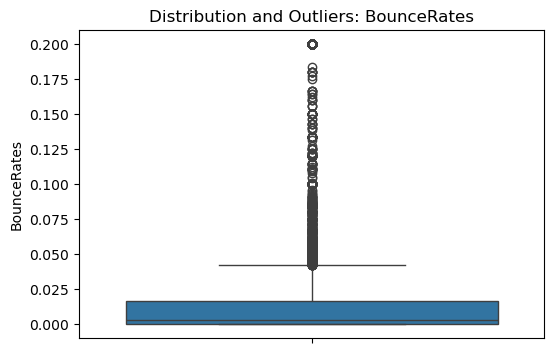

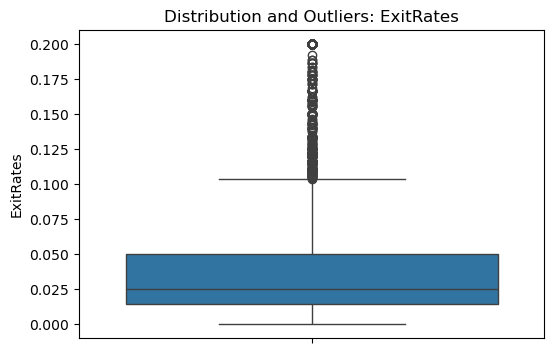

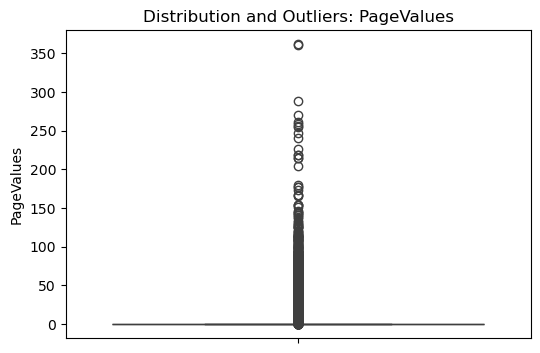

In [10]:
## Understanding distribution of features
num_cols = [
    'ProductRelated',
    'ProductRelated_Duration',
    'BounceRates',
    'ExitRates',
    'PageValues'
]

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f'Distribution and Outliers: {col}')
    plt.ylabel(col)
    plt.show()

Boxplots are used to examine the distribution and presence of outliers in key numerical features that describe user engagement and session behaviour, including `ProductRelated`, `ProductRelated_Duration`, `BounceRates`, `ExitRates`, and `PageValues`.

The visualisations show that several features exhibit **right-skewed distributions** with a large number of outliers:

- **ProductRelated** and **ProductRelated_Duration** display long right tails, indicating that while most users view a small number of product-related pages, a subset of users spend significantly more time exploring products.
- **PageValues** contains many extreme values, which likely correspond to sessions that are strongly associated with completed purchases.
- **BounceRates** and **ExitRates** show higher values for certain sessions, reflecting users who leave the site early without further interaction.

These outliers are considered **meaningful behavioural patterns rather than data errors**, as they represent highly engaged or disengaged user sessions that are common in real-world e-commerce data.

As a result:
- Outliers are **retained** to preserve important information related to purchase intent.
- Numerical features will be **standardised** during preprocessing to reduce scale-related dominance.
- Tree-based ensemble models will be explored later, as they are more robust to skewed distributions and outliers compared to linear models.

This analysis directly informs subsequent preprocessing and model selection decisions, ensuring that the modelling approach remains aligned with the underlying data characteristics.

### 2.3.2 Understanding relationship between variables

### 2.3.2.1 Behavioural Features vs Purchase Outcome

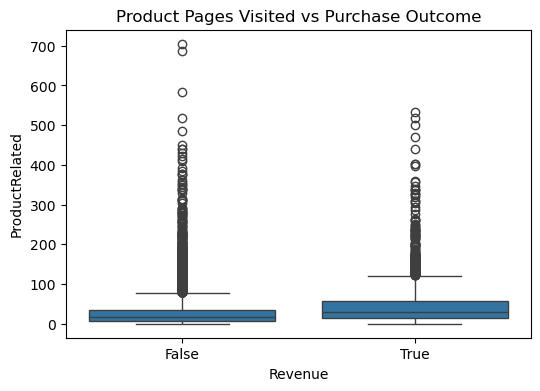

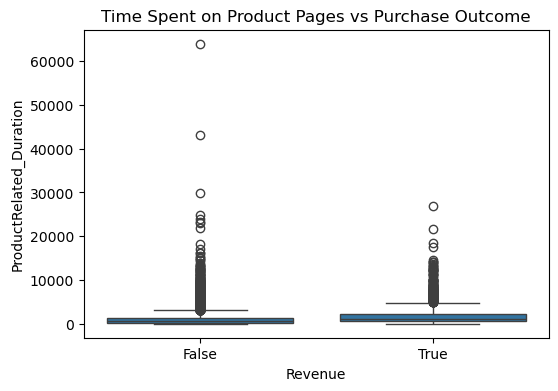

In [12]:
## Relationship between features and target variable
plt.figure(figsize=(6,4))
sns.boxplot(x='Revenue', y='ProductRelated', data=df)
plt.title('Product Pages Visited vs Purchase Outcome')
plt.show()
## Relationship between features and target variable
plt.figure(figsize=(6,4))
sns.boxplot(x='Revenue', y='ProductRelated_Duration', data=df)
plt.title('Time Spent on Product Pages vs Purchase Outcome')
plt.show()

To understand how user behaviour influences purchase decisions, boxplots are used to compare key behavioural features across purchasing (`Revenue = True`) and non-purchasing (`Revenue = False`) sessions.

### Product Pages Visited vs Purchase Outcome
The distribution of `ProductRelated` shows that purchasing sessions generally involve a **higher number of product-related page visits** compared to non-purchasing sessions. While both groups exhibit right-skewed distributions, the median and upper quartiles for purchasing sessions are noticeably higher.

This suggests that users who explore more product pages are more likely to complete a transaction, highlighting `ProductRelated` as a potentially informative predictor of purchase intent.

### Time Spent on Product Pages vs Purchase Outcome
A clearer separation is observed in `ProductRelated_Duration`. Purchasing sessions tend to have **longer durations spent on product-related pages**, indicating deeper engagement with product information before checkout.

Although outliers exist in both groups, the purchasing sessions consistently show higher central tendency and spread. These extreme values likely represent highly motivated users rather than anomalies.

### Implications for Modelling
These observations indicate that:
- Behavioural engagement features are strongly associated with purchase outcomes.
- Features such as `ProductRelated` and `ProductRelated_Duration` are likely to contribute positively to model performance.
- Non-linear relationships and skewed distributions are present, motivating the use of **ensemble-based models** (e.g., Random Forest) in addition to linear baselines.

This analysis provides empirical justification for retaining these features during preprocessing and prioritising engagement-related variables during model training.

### 2.3.2.2 Engagement Quality Metrics (Negative Signals)

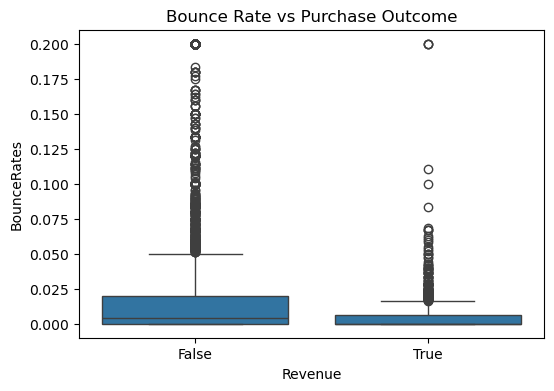

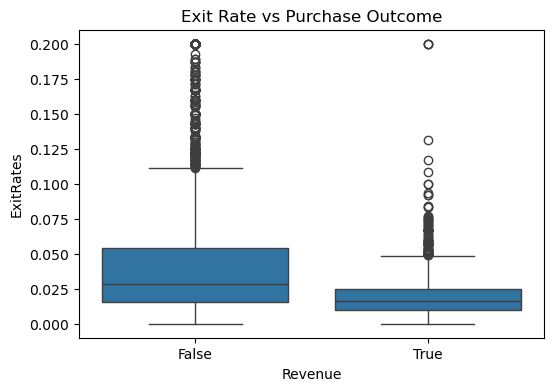

In [16]:
## Additional relationships between features and target variable
plt.figure(figsize=(6,4))
sns.boxplot(x='Revenue', y='BounceRates', data=df)
plt.title('Bounce Rate vs Purchase Outcome')
plt.show()
## Additional relationships between features and target variable
plt.figure(figsize=(6,4))
sns.boxplot(x='Revenue', y='ExitRates', data=df)
plt.title('Exit Rate vs Purchase Outcome')
plt.show()

To further examine how engagement quality relates to purchase behaviour, boxplots are used to compare `BounceRates` and `ExitRates` across purchasing and non-purchasing sessions. These metrics represent **negative engagement signals**, as higher values indicate users leaving the site early or exiting without further interaction.

### Bounce Rate vs Purchase Outcome
The distribution of `BounceRates` shows that non-purchasing sessions generally exhibit **higher bounce rates** compared to purchasing sessions. The median bounce rate for purchasing sessions is close to zero, suggesting that users who complete a purchase are less likely to leave the site after viewing a single page.

This indicates that high bounce rates are negatively associated with purchase intent and may serve as strong indicators of low engagement or poor session quality.

### Exit Rate vs Purchase Outcome
A similar pattern is observed for `ExitRates`. Non-purchasing sessions tend to have higher exit rates, while purchasing sessions are more concentrated at lower values. This suggests that users who proceed to checkout typically navigate through multiple pages before exiting the site.

### Implications for Modelling
These findings highlight that:
- `BounceRates` and `ExitRates` are **inversely related** to purchase outcomes.
- High values of these features signal disengagement and are associated with a lower likelihood of conversion.
- These metrics are likely to contribute meaningful predictive power when distinguishing between high-intent and low-intent sessions.

Given their skewed distributions and interaction with other behavioural features, these variables further support the exploration of **non-linear and ensemble-based models** in addition to linear baselines.

### 2.3.2.3 PageValues — Dominant Predictive Feature

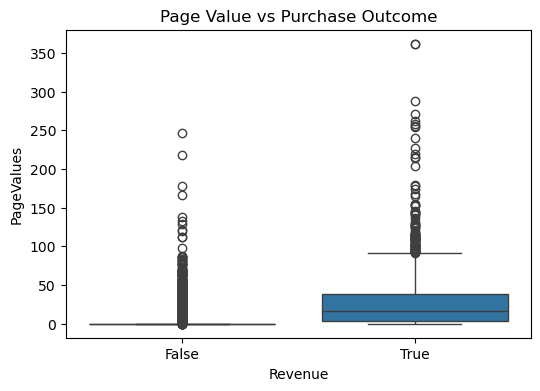

In [17]:
## Additional relationships between features and target variable
plt.figure(figsize=(6,4))
sns.boxplot(x='Revenue', y='PageValues', data=df)
plt.title('Page Value vs Purchase Outcome')
plt.show()

The boxplot compares the distribution of `PageValues` across purchasing and non-purchasing sessions to assess its relationship with purchase outcomes.

A clear and substantial separation is observed between the two groups. Non-purchasing sessions show `PageValues` concentrated near zero, while purchasing sessions exhibit significantly higher median values and a wider spread. This indicates that pages associated with completed purchases contribute disproportionately to the overall page value metric.

Unlike other behavioural features, `PageValues` demonstrates **strong discriminative power**, with minimal overlap between purchasing and non-purchasing sessions. This suggests that `PageValues` is a dominant predictor of purchase intent and captures highly relevant transactional signals.

### Implications for Modelling
- `PageValues` is expected to be one of the most influential features during model training.
- The strong separation between classes suggests that even simple models may leverage this feature effectively.
- Due to its skewed distribution and interaction with other behavioural metrics, both linear and tree-based models will be evaluated to assess how they capture its predictive signal.

This analysis provides strong empirical justification for retaining `PageValues` in the feature set and highlights its importance in predicting online purchase behaviour.

### 2.3.2.4 Categorical Behaviour vs Purchase Outcome

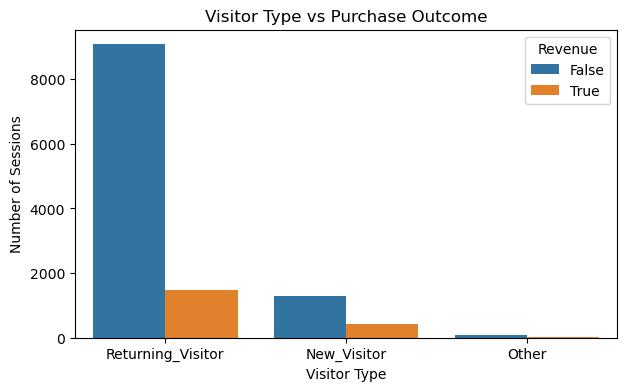

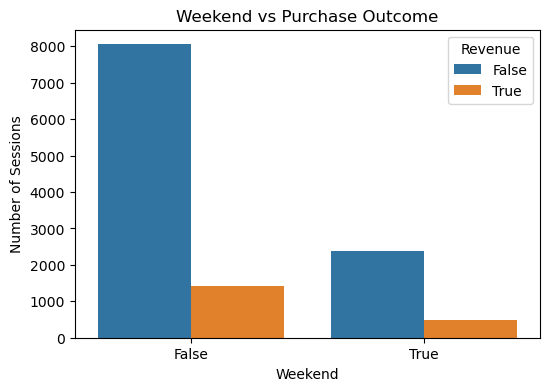

In [18]:
## Categorical feature analysis
plt.figure(figsize=(7,4))
sns.countplot(x='VisitorType', hue='Revenue', data=df)
plt.title('Visitor Type vs Purchase Outcome')
plt.xlabel('Visitor Type')
plt.ylabel('Number of Sessions')
plt.legend(title='Revenue')
plt.show()
## Categorical feature analysis
plt.figure(figsize=(6,4))
sns.countplot(x='Weekend', hue='Revenue', data=df)
plt.title('Weekend vs Purchase Outcome')
plt.xlabel('Weekend')
plt.ylabel('Number of Sessions')
plt.legend(title='Revenue')
plt.show()

To complement the numerical feature analysis, categorical behavioural features are examined to understand how user context influences purchase outcomes. Count plots are used to compare purchasing and non-purchasing sessions across different categories.

### Visitor Type vs Purchase Outcome
The distribution shows that **returning visitors** account for the largest number of purchasing sessions compared to new or other visitor types. While returning visitors also form the majority of non-purchasing sessions due to their higher overall presence, the proportion of purchases among returning visitors is noticeably higher.

This suggests that returning visitors are more familiar with the platform, have higher trust, or are further along the decision-making process, making them more likely to complete a purchase.

New visitors exhibit fewer purchasing sessions, which is consistent with exploratory browsing behaviour. The `Other` category contributes minimally and is unlikely to be a strong standalone predictor.

### Weekend vs Purchase Outcome
The weekend analysis indicates that while fewer sessions occur on weekends overall, the proportion of purchasing sessions remains comparable to weekdays. This suggests that purchase intent is not strictly constrained by the day of visit, but may interact with other behavioural factors such as engagement level and product exploration.

### Implications for Modelling
These observations indicate that:
- `VisitorType` contains meaningful contextual information and should be retained as a categorical feature.
- `Weekend` alone may not be a strong predictor, but could provide additional signal when combined with behavioural features.
- One-hot encoding is an appropriate transformation for these categorical variables to allow models to capture category-specific effects.

This analysis supports the inclusion of categorical behavioural features alongside numerical engagement metrics during model training.

# 3. Data Preparation

## 3.1 Preprocessing

### 3.1.1 Define Features (X) and Target (y)

In [19]:
## Define Features and Target variable
X = df.drop('Revenue', axis=1)
y = df['Revenue']

X.shape, y.shape

((12330, 17), (12330,))

The dataset is separated into feature variables **X** and the target variable **y**, where `Revenue` indicates whether a user session resulted in a completed purchase.

This explicit separation ensures that the target variable is not accidentally used during preprocessing or feature transformation, thereby preventing data leakage and preserving the integrity of model evaluation.

### 3.1.2 Identify Feature Types

In [ ]:
num_features = X.select_dtypes(include=['int64', 'float64']).columns
cat_features = X.select_dtypes(include=['object']).columns
bool_features = X.select_dtypes(include=['bool']).columns

num_features, cat_features, bool_features

(Index(['Administrative', 'Administrative_Duration', 'Informational',
        'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
        'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
        'OperatingSystems', 'Browser', 'Region', 'TrafficType'],
       dtype='object'),
 Index(['Month', 'VisitorType'], dtype='object'),
 Index(['Weekend'], dtype='object'))

### 3.1.3 Construct Preprocessing Pipelines

#### 3.1.3.1 Numerical Features

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
## Define numeric transformer
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

Numerical features do not contain missing values based on prior data quality checks. Therefore, imputation is not required.

Standardisation is applied to ensure that all numerical features have comparable scales. This is particularly important for models such as Logistic Regression, which are sensitive to feature magnitude.

#### 3.1.3.2 Categorical Features

In [ ]:
from sklearn.preprocessing import OneHotEncoder
## Define categorical transformer
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Categorical features are transformed using one-hot encoding to convert them into a numerical format suitable for machine learning models.

The `handle_unknown='ignore'` parameter ensures that the model can safely handle unseen categories during deployment without causing runtime errors.

#### 3.1.3.3 Boolean Features

In [ ]:
boolean_transformer = 'passthrough'

### 3.1.4 Combine Pipelines Using ColumnTransformer

In [ ]:
from sklearn.compose import ColumnTransformer
## Combine all transformers into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features),
        ('bool', boolean_transformer, bool_features)
    ]
)

preprocessor

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


A `ColumnTransformer` is used to apply separate preprocessing pipelines to numerical, categorical, and boolean features in a structured and reproducible manner.

By embedding all transformations within a single preprocessing object, transformations are learned exclusively from the training data and applied consistently to unseen data. This design effectively prevents data leakage and enables seamless integration with model pipelines and hyperparameter tuning.

## 3.2 Stratified Train-Test Split

In [26]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

X_train.shape, X_test.shape

((9864, 17), (2466, 17))

A stratified train–test split is applied to preserve the original class distribution of the target variable in both the training and test sets.

This is particularly important due to the class imbalance observed during exploratory data analysis and ensures that model evaluation remains fair and representative of real-world e-commerce behaviour.

## 3.3 Outliar Handling Decision

Exploratory analysis revealed the presence of outliers in features such as `ProductRelated_Duration`, `PageValues`, `BounceRates`, and `ExitRates`.

These values are considered meaningful behavioural signals rather than data errors, as they represent highly engaged or disengaged user sessions. Removing these outliers could eliminate important information related to purchase intent.

Therefore, outliers are retained during preprocessing, and their impact will be evaluated through model selection and comparison, including the use of tree-based ensemble models that are robust to skewed distributions.

## 3.4 Summary of Preprocessing Decisions

In summary, the preprocessing pipeline:
- Handles mixed feature types using dedicated transformations
- Preserves class imbalance through stratified sampling
- Prevents data leakage by fitting transformations only on training data
- Retains meaningful behavioural outliers
- Produces a clean and reusable preprocessing structure compatible with model pipelines and deployment

This structured data preparation approach provides a strong and reliable foundation for subsequent model training and evaluation.

# 4. Modelling

### 4.2 Train Model

In [ ]:
## Initialise and train model


# 5. Model Evaluation

In [ ]:
## Evaluate model


In [ ]:
## New data

## Predict


## Iterative model development


In [ ]:
## Further feature engineering / feature selection